In [1]:
import sys,os,glob,copy
sys.path.append('../')
import numpy as np
from numpy.linalg import norm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d
import matplotlib as mpl
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown
import glob
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')


pd.set_option('display.max_rows', 200)

### Load CMS CutFlow

In [2]:
cmsData = pd.read_pickle('../CMS-EXO-20-004/AuxInfo/CMS-EXO-20-004-data/DMsimp_spin-0_Monojet_DF.pcl')
cmsData['filename'] = 'CMS'

### Add recast samples

In [3]:
# files = {
#          'pseudo' : '../CMS-EXO-20-004/pseudoscalar_single_bias.pcl' 
#         }


files = {
         'pseudo' : '../DMSimp_pseudoscalar_figure/Events/run_02/pseudoscalar_800_1_cms_exo_20_004.pcl' 
        }

# files = {
#          'match_bias' : '../pseudoscalar_match_bias.pcl',
#          'match_nobias' : '../CMS-EXO-20-004/pseudoscalar_0j1j.pcl',
#          'single_bias' : '../CMS-EXO-20-004/pseudoscalar_single_bias.pcl'
#          'single_nobias' : '../CMS-EXO-20-004/pseudoscalar_single_nobias.pcl'
#         }

# files = {
#          'scalar' : '../CMS-EXO-20-004/scanResults_scalar_cms_nocut.pcl',
#          'pseudo' : '../CMS-EXO-20-004/scanResults_pseudoscalar_cms_nocut.pcl' 
#         }

# files = {'recast' : '../scalar_500_1.pcl'}
# files = {'recast' : '../scalar_800_1.pcl'}
# files = {
#         'recastHigh' : '../scalar_800_1_noBias.pcl',
#         'recastLow' : '../scalar_800_1_low.pcl',
#         }

# files = {'xqcut_25_bias': '../DMSimp_pseudoscalar_0j_bias/Events/run_10/pseudoscalar_600_1_xqcut_25_cms_exo_20_004.pcl',
#          'xqcut_100_bias': '../DMSimp_pseudoscalar_0j_bias/Events/run_11/pseudoscalar_600_1_xqcut_100_cms_exo_20_004.pcl',
#          'xqcut_200_bias': '../DMSimp_pseudoscalar_0j_bias/Events/run_12/pseudoscalar_600_1_xqcut_200_cms_exo_20_004.pcl',
#          'xqcut_25': '../DMSimp_pseudoscalar_all/Events/run_10/pseudoscalar_600_1_xqcut_25_cms_exo_20_004.pcl',
#          'xqcut_100': '../DMSimp_pseudoscalar_all/Events/run_11/pseudoscalar_600_1_xqcut_100_cms_exo_20_004.pcl',
#          'xqcut_200': '../DMSimp_pseudoscalar_all/Events/run_12/pseudoscalar_600_1_xqcut_200_cms_exo_20_004.pcl',
#          'nomatch': '../CMS-EXO-20-004/pseudoscalar_single_bias.pcl',
#          'xqcut_40': '../CMS-EXO-20-004/pseudoscalar_0j1j.pcl',
#          'xqcut_40_bias': '../pseudoscalar_match_bias.pcl'}

allData = cmsData
for label,f in files.items():
    recastData = pd.read_pickle(f)
    recastData['filename'] = label
    allData = pd.concat((allData,recastData))
    
allData.sort_values(['Coupling','Mode','$m_{med}$','$m_{DM}$','Data-takingperiod'],inplace=True,
              ascending=[False,False,True,True,True])    

In [4]:
cmsData = cmsData[cmsData['Data-takingperiod'] == 2017] 
allData = allData[allData['Data-takingperiod'] == 2017] 

In [5]:
allData = allData[(allData['Coupling'] == 'Pseudoscalar') & (allData['$m_{DM}$'] == 1.0)]


In [6]:
# cmsSigmaSc = np.array(cmsData['Total xsec-pT150 (pb)'][(cmsData['Coupling'] == 'Scalar')][(cmsData['$m_{DM}$'] == 1)])
# cmsSigmaPs = np.array(cmsData['Total xsec-pT150 (pb)'][(cmsData['Coupling'] == 'Pseudoscalar')][(cmsData['$m_{DM}$'] == 1)])

In [7]:
# scalar = allData[allData['filename'] == 'scalar']
# pseudo = allData[allData['filename'] == 'pseudo']
# scalar = scalar[scalar['$m_{DM}$'] == 1]
# pseudo = pseudo[pseudo['$m_{DM}$'] == 1]

In [8]:
# plt.plot(pseudo['$m_{med}$'], pseudo['Total xsec-pT150 (pb)'])
# plt.plot(pseudo['$m_{med}$'], cmsSigmaPs)


# plt.plot(scalar['$m_{med}$'], scalar['Total xsec-pT150 (pb)'])
# plt.plot(scalar['$m_{med}$'], cmsSigmaSc)

# plt.plot(scalar['$m_{med}$'], scalar['Total xsec-pT150 (pb)']/pseudo['Total xsec-pT150 (pb)'])

# plt.plot(scalar['$m_{med}$'], cmsSigmaSc/cmsSigmaPs)

# plt.show()

In [9]:
# sigmaRecast = scalar['Total xsec-pT150 (pb)']/pseudo['Total xsec-pT150 (pb)']

# plt.plot(scalar['$m_{med}$'], sigmaRecast, label='recast')

# plt.plot(scalar['$m_{med}$'], cmsSigmaSc/cmsSigmaPs, label='CMS')

# # plt.fill_between(scalar['$m_{med}$'],1.1*sigmaRecast, 0.9*sigmaRecast, alpha=0.5, 
# #                    linewidth=0,label=r'$\pm 10$\%' )

# # plt.fill_between(scalar['$m_{med}$'],1.1*cmsSigmaSc/cmsSigmaPs, 0.9*cmsSigmaSc/cmsSigmaPs, alpha=0.5, 
# #                    linewidth=0,label=r'$\pm 10$\%' )

# plt.title(r'Cross section ratio for $m_{\chi} = 1$ GeV')
# plt.ylabel(r'$\frac{\sigma_{scalar}}{\sigma_{pseudo}}$')
# plt.xlabel(r'$M_{med}$ (GeV)')

# plt.legend(loc='upper left')
# plt.show()

In [10]:
# plt.plot(pseudo['$m_{med}$'], cmsSigmaPs/pseudo['Total xsec-pT150 (pb)'], label='Pseudoscalar couplings')
# plt.plot(scalar['$m_{med}$'], cmsSigmaSc/scalar['Total xsec-pT150 (pb)'], label='Scalar couplings')

# plt.title(r'Cross section ratio for $m_{\chi} = 1$ GeV')
# plt.ylabel(r'$\frac{\sigma_{CMS}}{\sigma_{recast}}$')
# plt.xlabel(r'$M_{med}$ (GeV)')

# plt.legend(loc='lower left', fontsize='x-small')
# plt.show()

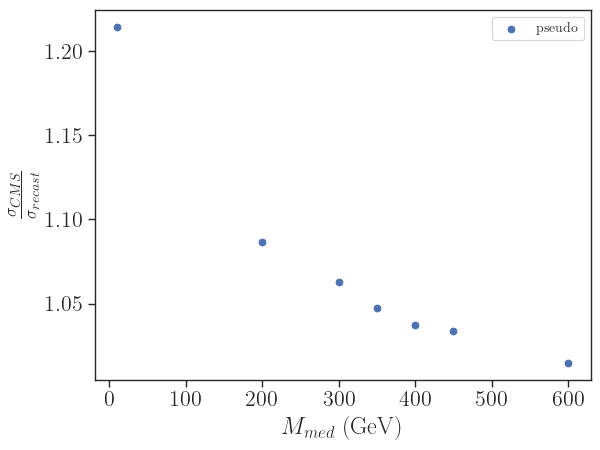

In [11]:
for label in files.keys():
    mMed = allData['$m_{med}$'][allData['filename'] == label]
    xsec = allData['Total xsec-pT150 (pb)'][allData['filename'] == label]
    xsecCMS = []
    for mass in mMed:
        xsecCMS.append(float(allData['Total xsec-pT150 (pb)'][(allData['filename'] == 'CMS') 
                                                              & (allData['$m_{med}$'] == mass)]))
    xsecCMS = np.array(xsecCMS)
    plt.scatter(mMed, xsecCMS/xsec, label=label)
    
plt.ylabel(r'$\frac{\sigma_{CMS}}{\sigma_{recast}}$')
plt.xlabel(r'$M_{med}$ (GeV)')
plt.legend(fontsize='xx-small')
# plt.yscale('log')
plt.show()

In [12]:
ratios = pd.DataFrame(columns=['$m_{med}$', 'xsec', 'ratio', 'filename'])
ratios['filename'] = allData['filename'][allData['filename'] != 'CMS']
ratios['$m_{med}$'] = allData['$m_{med}$'][allData['filename'] != 'CMS']
ratios['xsec'] = allData['Total xsec-pT150 (pb)'][allData['filename'] != 'CMS']
xsecCMS, xsec = {}, {}
r = []

for label in files.keys():
    mMed = allData['$m_{med}$'][allData['filename'] == label]
    xsecCMS[label] = [float(allData['Total xsec-pT150 (pb)'][(allData['filename'] == 'CMS') 
                                                              & (allData['$m_{med}$'] == m)]) for m in mMed]
    xsec[label] = list(ratios['xsec'][ratios['filename'] == label])
    
    for i, val in enumerate(xsecCMS[label]):
        r.append(xsecCMS[label][i]/xsec[label][i])
        
ratios['ratio'] = r

In [13]:
ratios

,$m_{med}$,xsec,ratio,filename
1,200.0,2.053501,0.245125,nomatch
1,200.0,13.861900,0.246200,xqcut_40
1,200.0,13.847163,0.231706,xqcut_40_bias
4,300.0,1.711336,0.246823,nomatch
4,300.0,9.182676,0.245088,xqcut_40_bias
7,350.0,1.919079,0.231522,nomatch
4,350.0,10.117039,0.882623,xqcut_40
7,350.0,10.029491,0.879501,xqcut_40_bias
10,400.0,0.928323,0.876482,nomatch
7,400.0,4.298669,0.875555,xqcut_40


### Select model

In [4]:
# Rename columns
allData.rename(columns = {'$m_{med}$':'$M_{med}$', '$m_{DM}$':'$m_{\chi}$', '$g_{DM}$':'$g_{\chi}$'}, 
                inplace=True)

In [5]:
modelFilter = {'Coupling' : 'Pseudoscalar', 
 'Mode' : 'DM+QCDjets', 
 '$M_{med}$' : 800.0,
 '$m_{\chi}$' : 1.0,
 '$g_{\chi}$' : 1.0,
 '$g_{q}$' : 1.0}


textstr = '\n'.join([r'%s = %s' %(k,v) for k,v in modelFilter.items()])
dfModel = allData.loc[(allData[list(modelFilter)] == pd.Series(modelFilter)).all(axis=1)]
dfModel = dfModel[dfModel['Data-takingperiod'] == 2017]


# ratio = {}
# for c in dfModel.columns:
#     xList = dfModel[c].tolist()
#     if all(isinstance(x,float) for x in xList):
#         if xList[1]:
#             ratio.update({c : [xList[0]/xList[1]]})
#         else:
#             ratio.update({c : [np.nan]})
# dfRatio = pd.DataFrame.from_dict(ratio)
# dfRatio.T

In [6]:
dfModel.T

,124,1
Coupling,Pseudoscalar,Pseudoscalar
Mode,DM+QCDjets,DM+QCDjets
$M_{med}$,800.0,800.0
$m_{\chi}$,1.0,1.0
$g_{\chi}$,1.0,1.0
$g_{q}$,1.0,1.0
Data-takingperiod,2017,2017
Fullsample,1.0,1.0
Triggeremulation,0.72145,0.835083
$p_{T}^{miss}>250$GeV,0.3572,0.359438


### Aux functions for plotting

In [7]:
def getBins(dfModel,rightBin = 2000.):
    
    bins = {c : eval(c.split('_')[1]) for c in dfModel.columns if ("bin_" in c and not 'Error' in c)}
    binsError = {c : eval(c.split('_')[1]) for c in dfModel.columns if ("bin_" in c and 'ErrorPlus' in c)}    
    binCenter = (np.array(list(bins.values()))+np.diff(list(bins.values())+[rightBin])/2).tolist()    
    binLeft = [bins[c] for c in bins]+[rightBin] 
    
    return bins,binsError,binCenter,binLeft
    
def getMETbins(dfSingle,bins,binsError):

    data = {c : dfSingle[c].iloc[0] for c in bins}
    dataError = {c : dfSingle[c].iloc[0] for c in binsError}

    return data,dataError

def getKfactors(data):

    # Define k-factors so the signal yield summed over all
    # MET bins equals CMS
    totCMS = sum(data['CMS'].values())
    kfactors = {label : totCMS/sum(data[label].values()) for label in data} 
    
    
    return kfactors


### Plot MET bins

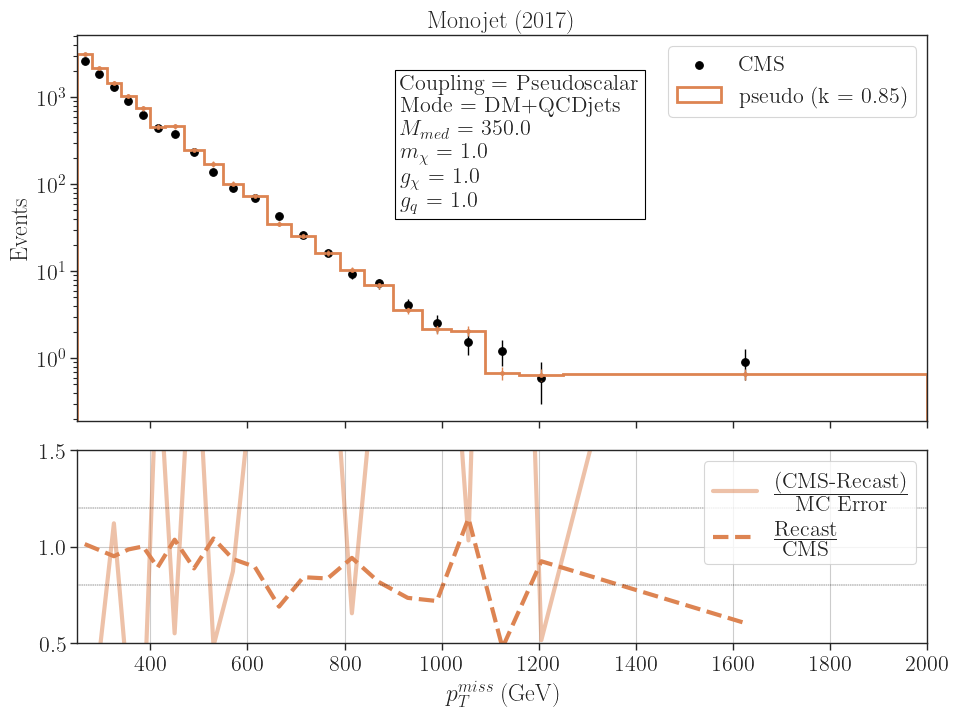

In [8]:
bins,binsError,binCenter,binLeft = getBins(dfModel)

for ds in dfModel['Data-takingperiod'].unique():
    dfDS = dfModel[dfModel['Data-takingperiod'] == ds]
    f, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(10,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)
    
    data = {}
    dataError = {}
    for label in dfDS['filename']:
        dfSingle = dfDS[dfDS['filename'] == label]
        d,dError = getMETbins(dfSingle,bins,binsError)
        data[label] = d
        dataError[label] = dError
    
    colors = {label : sns.color_palette('deep')[i] for i,label in enumerate(data.keys())}    
    colors['CMS'] = 'black'
    weightsCMS = np.array([data['CMS'][c] for c in bins])
    kfactors = getKfactors(data)
    for label in data:    
#         kfactor = kfactors[label]
        kfactor = 0.85
        weights = kfactor*np.array([data[label][c] for c in bins])
        error = kfactor*np.array([dataError[label][c] for c in binsError])    
        if label == 'CMS':        
            axarr[0].scatter(x=binCenter,y=weights,s=30,c=colors[label],label=label)
        else:
            axarr[0].hist(binCenter,bins=binLeft,
                           label=label+' (k = %1.2f)' %kfactor,linewidth=2,
                           weights=weights,histtype='step',
                          color=colors[label])



            relDiff = (weights-weightsCMS)/weightsCMS
            ratio = weights/weightsCMS
            relDiffErr = np.abs(weights-weightsCMS)/error
            #Plot ratio
            label1 = r'$\frac{\mbox{(CMS-Recast)}}{\mbox{MC Error}}$'
            label2 = r'$\frac{\mbox{Recast}}{\mbox{CMS}}$'
            axarr[1].plot(binCenter,relDiffErr,linewidth=3.0,color=colors[label],
                          label=label1,alpha=0.5)
            axarr[1].plot(binCenter,ratio,linewidth=3.0,color=colors[label],linestyle='--', 
                          label=label2)        

        axarr[0].errorbar(binCenter,weights,yerr = error, marker = '.', elinewidth=1.0,
                 drawstyle = 'steps-mid',linewidth=0.0,color=colors[label])


    axarr[1].set_yticks([0.,0.5,1.0,1.5,2.0,2.5])
    axarr[1].grid(True)
    axarr[1].set_xlabel(r'$p_{T}^{miss}$ (GeV)')
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel('Events')
    axarr[0].legend()
    axarr[1].legend()
    
    axarr[0].text(0.38,2.26,textstr,fontsize=16,bbox=dict(facecolor='none', edgecolor='black'),
         transform = plt.gca().transAxes)
    
#     axarr[0].set_ylim(1e-2,1e2)
    axarr[0].set_xlim(250,2000)
    axarr[1].hlines(y=1.2, xmin=250, xmax=2000., linestyle='--', color='black', linewidth=0.3)
    axarr[1].hlines(y=.8, xmin=250, xmax=2000., linestyle='--', color='black', linewidth=0.3)
    axarr[1].set_ylim(0.5,1.5)
    axarr[0].set_title('Monojet (%s)' %ds)
    plt.show()


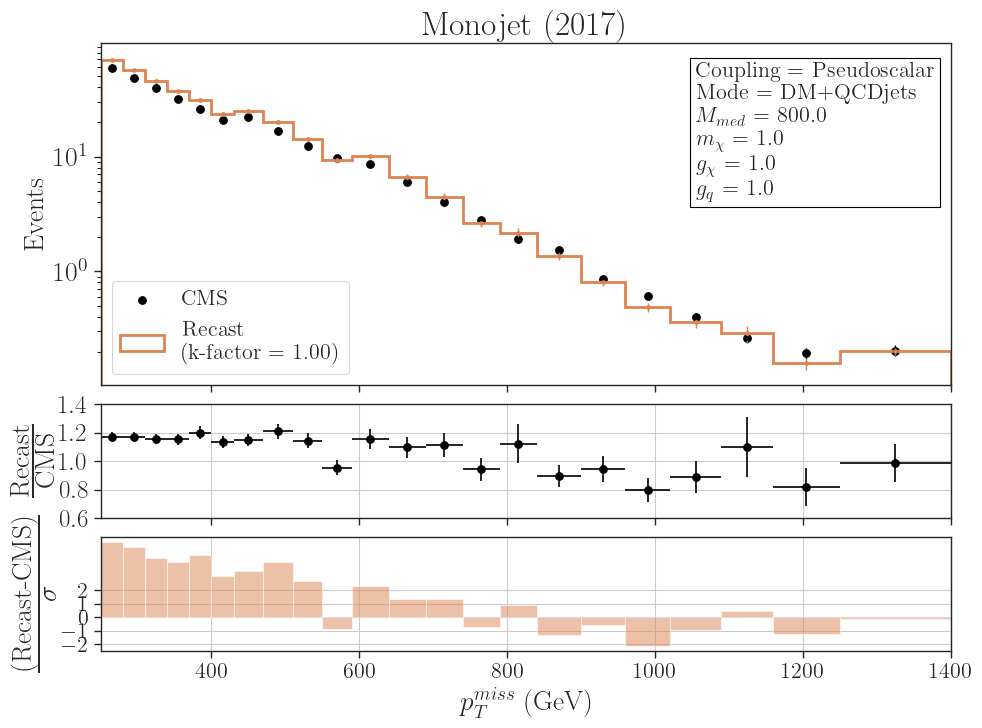

In [8]:
bins,binsError,binCenter,binLeft = getBins(dfModel, rightBin=1400)

for ds in dfModel['Data-takingperiod'].unique():
    dfDS = dfModel[dfModel['Data-takingperiod'] == ds]
    f, axarr = plt.subplots(3,sharex=True, gridspec_kw = {'height_ratios':[3, 1, 1]},figsize=(10,8))
    plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)
    
    data = {}
    dataError = {}
    for label in dfDS['filename']:
        dfSingle = dfDS[dfDS['filename'] == label]
        d,dError = getMETbins(dfSingle,bins,binsError)
        data[label] = d
        dataError[label] = dError
    
    colors = {label : sns.color_palette('deep')[i] for i,label in enumerate(data.keys())}    
    colors['CMS'] = 'black'
    weightsCMS = np.array([data['CMS'][c] for c in bins])
    kfactors = getKfactors(data)
    for label in data:    
#         kfactor = kfactors[label]
        kfactor = 1.0
        weights = kfactor*np.array([data[label][c] for c in bins])
        error = kfactor*np.array([dataError[label][c] for c in binsError]) 
        errorCMS = np.array([dataError['CMS'][c] for c in binsError]) 
        if label == 'CMS':  
            axarr[0].scatter(x=binCenter,y=weights,s=30,c=colors[label],label=label)
            axarr[0].errorbar(binCenter,weights,yerr=errorCMS, marker = '.', elinewidth=1.0,
                              drawstyle = 'steps-mid',linewidth=0.0,color=colors[label])
        else:
            axarr[0].hist(binCenter,bins=binLeft,
                           label='Recast \n (k-factor = %1.2f)' %kfactor,linewidth=2,
                           weights=weights,histtype='step',
                          color=colors[label])
            axarr[0].errorbar(binCenter,weights,yerr=error, marker = '.', elinewidth=1.0,
                              drawstyle = 'steps-mid',linewidth=0.0,color=colors[label])

            relDiff = (weights-weightsCMS)/weightsCMS
            ratio = weights/weightsCMS
#             relDiffErr = (weights-weightsCMS)/error
            sigma = np.sqrt(error**2 + errorCMS**2)
            relDiffErr = (weights-weightsCMS)/sigma
            ratioErr = np.sqrt(error**2 + ratio**2 * errorCMS**2)/weightsCMS
            errorh = (np.diff(binLeft+[2000.])/2).tolist()

            
            #Plot ratio
            label1 = r'$\frac{\mbox{(Recast-CMS)}}{\mbox{$\sigma$}}$'
            label2 = r'$\frac{\mbox{Recast}}{\mbox{CMS}}$'
#             axarr[1].plot(binCenter,relDiffErr,linewidth=3.0,color=colors[label],
#                           label=label1,alpha=0.5)
#             axarr[1].plot(binCenter,ratio,linewidth=3.0,color=colors[label],linestyle='--', 
#                           label=label2)     
#             height1 = ratio - 1
            height2 = relDiffErr
#             axarr[1].hist(binCenter,bins=binLeft,color=colors[label],weights=height1, bottom=1.0)    
#             axarr[1].bar(binCenter,height, align='edge')
            axarr[1].scatter(x=binCenter, y=ratio, s=30, c='black')
            axarr[1].errorbar(binCenter, ratio, yerr=ratioErr, xerr=errorh[:-1], fmt='.', c='black')
            axarr[2].hist(binCenter,bins=binLeft,color=colors[label], weights=height2,
                          alpha=0.5)
            



    axarr[1].set_yticks([0.,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0])
    axarr[2].set_yticks([-2.0,-1.0,0.0,1.0,2.0])
    axarr[2].grid(True)
    axarr[1].grid(True)
    axarr[2].set_xlabel(r'$p_{T}^{miss}$ (GeV)', fontsize=20)
    axarr[0].set_yscale('log')
    axarr[0].set_ylabel('Events', fontsize=20)
    axarr[1].set_ylabel(label2, fontsize=20)
    axarr[2].set_ylabel(label1, fontsize=20)
    axarr[0].legend(loc='lower left')
    axarr[0].tick_params(labelsize=20)
    axarr[1].tick_params(labelsize=18)
    axarr[0].tick_params(labelsize=20)
#     axarr[1].legend()
#     axarr[2].legend(loc='upper right')
    
    axarr[0].text(0.7,4,textstr,fontsize=16,bbox=dict(facecolor='none', edgecolor='black'),
         transform = plt.gca().transAxes)
    
    # axarr[0].set_ylim(1e-2,1e3)
    axarr[0].set_xlim(250,1400)
    axarr[1].set_ylim(0.6,1.4)
    axarr[0].set_title('Monojet (%s)' %ds, fontsize = 24)
    
plt.show()


In [9]:
dfModel

,Coupling,Mode,$M_{med}$,$m_{\chi}$,$g_{\chi}$,$g_{q}$,Data-takingperiod,Fullsample,Triggeremulation,$p_{T}^{miss}>250$GeV,...,bin_1250.0_1400.0,bin_1250.0_1400.0_ErrorPlus,bin_1250.0_1400.0_ErrorMinus,Luminosity (1/fb),Total xsec-pT150 (pb),$\mu^{UL}_{obs}$,$\mu^{UL}_{exp}$,filename,Total MC Events,Total xsec (pb)
109,Pseudoscalar,DM+QCDjets,350.0,1.0,1.0,1.0,2017,1.0,0.611580,0.19613,...,1.077000,0.408690,-0.408690,41.5,1.682038,0.402619,0.36279,CMS,NaN,NaN
1,Pseudoscalar,DM+QCDjets,350.0,1.0,1.0,1.0,2017,1.0,0.837851,0.20429,...,0.838608,0.087108,0.087108,41.5,1.744503,NaN,NaN,pseudo,150000.0,1.915539


In [10]:
kfactors

{'CMS': 1.0, 'pseudo': 0.9009077883624674}

In [11]:
effCMS = np.array(dfModel['$\\Delta \\phi (\\mathrm{PF}_\\mathrm{Charged})<2.0$ rad'])[0]
eff = np.array(dfModel['HCALmitigation($\\phi^{miss}$)'])[1]

In [12]:
yCMS = sum(data['CMS'].values())/effCMS

In [13]:
y = sum(data['pseudo'].values())/eff

In [14]:
yCMS/y

0.9772153044999337

In [15]:
sum(data['CMS'].values())/sum(data['pseudo'].values())

0.9009077883624674